Author: Tyler Reiser

Date Modified: January 24, 2022 @ 5:47 MST

Summary: 3D model of the Lorenz ODE system approximated using the 4th-order Runge-Kutta method.

---

**Part I: Approximating the System of ODEs**

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook 

In [2]:
x = 1. # initial condition can be changed for different results
y = 5.
z = 10.

t0 = 0.
tf = 100.
dt = 0.008  # time step sufficiently small
tmax = 100.
vector_t = np.arange(t0, tmax, dt)
n = len(vector_t)

rho = 28.  # check wiki page for info of rho depencancy/interesting values
sigma = 10.
beta = 8./3.

# initialize
k1 = np.array([0., 0., 0.])
k2 = np.array([0., 0., 0.])
k3 = np.array([0., 0., 0.])
k4 = np.array([0., 0., 0.])


# Three functions for Lorenz Equations
def equation_1(t, x, y, z):
    return sigma*(y - x)


def equation_2(t, x, y, z):
    return rho*x - y - x*z


def equation_3(t, x, y, z):
    return x*y - beta*z


def RK4(t, x, y, z, equation_1, equation_2, equation_3, dt):

    k1[0] = dt*equation_1(t, x, y, z)
    k1[1] = dt*equation_2(t, x, y, z)
    k1[2] = dt*equation_3(t, x, y, z)

    k2[0] = dt*equation_1(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[1] = dt*equation_2(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)
    k2[2] = dt*equation_3(t + dt/2., x + k1[0]/2., y + k1[1]/2., z + k1[2]/2.)

    k3[0] = dt*equation_1(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[1] = dt*equation_2(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)
    k3[2] = dt*equation_3(t + dt/2., x + k2[0]/2., y + k2[1]/2., z + k2[2]/2.)

    k4[0] = dt*equation_1(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[1] = dt*equation_2(t + dt, x + k3[0], y + k3[1], z + k3[2])
    k4[2] = dt*equation_3(t + dt, x + k3[0], y + k3[1], z + k3[2])

    x = x + (1./6.)*(k1[0] + 2.*k2[0] + 2.*k3[0] + k4[0])
    y = y + (1./6.)*(k1[1] + 2.*k2[1] + 2.*k3[1] + k4[1])
    z = z + (1./6.)*(k1[2] + 2.*k2[2] + 2.*k3[2] + k4[2])

    return np.array([x, y, z])


term = np.zeros((n, 3)) # setting initial conditions
term[0, 0] = x  # convective intensity, check WolframAlpha page for info on these
term[0, 1] = y  # temp difference btwn ascending/descending currents
term[0, 2] = z  # dif in vertical temp


for i in range(n - 1): # loop the stages over i
    term[i+1, :] = RK4(vector_t[i], term[i, 0], term[i, 1],
                       term[i, 2], equation_1, equation_2, equation_3, dt)

This will run a short animation to give a visual of the Lorenz Attractor.

<IPython.core.display.Javascript object>


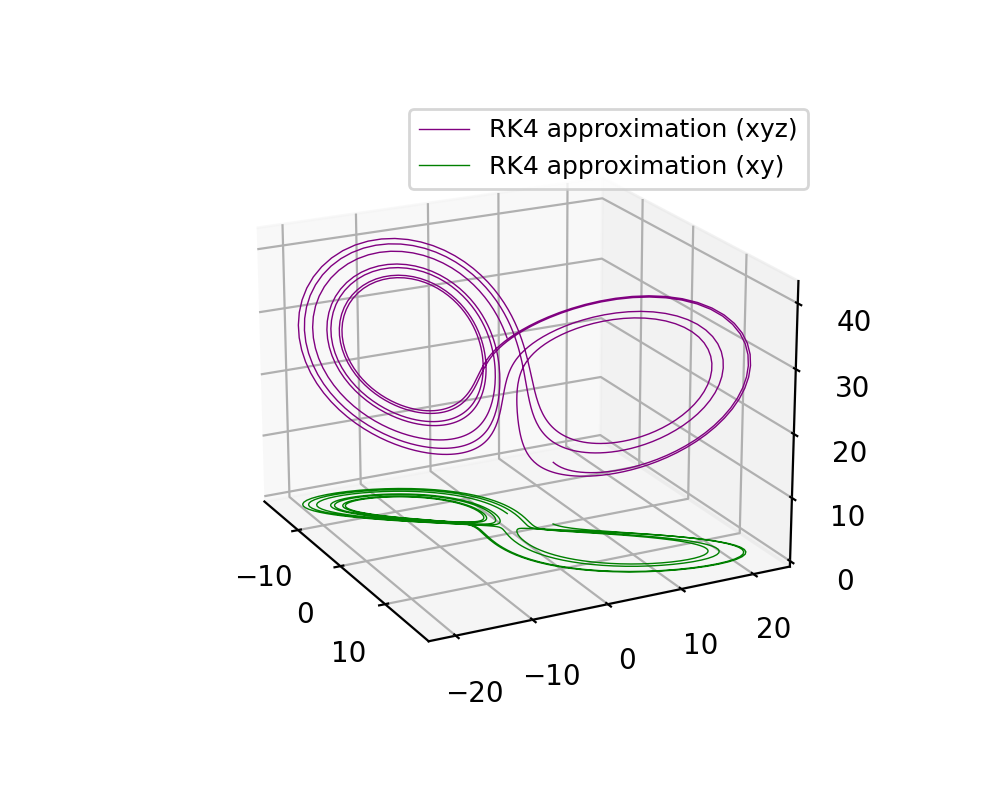

In [3]:
fig = plt.figure('Lorenz System of ODEs', figsize=(5, 4), dpi=100)
ax = fig.gca(projection='3d')


def animate(i): # Anim function; original version set default grid to off
    ax.view_init(20,i/3) # rotate as i increases
    ax.clear()
    ax.set(facecolor='white')
    ax.plot(term[:i, 0], term[:i, 1], term[:i, 2],
            color='purple', lw=0.5, label='RK4 approximation (xyz)') # plots x,y,z
    ax.plot(term[:i, 0], term[:i, 1], 
            color='green', lw=0.5, label='RK4 approximation (xy)') # plots x,y
    ax.legend(fontsize=9)


ani = animation.FuncAnimation(
    fig, animate, np.arange(1000), interval=5, repeat=False) # anim object; 2k frame, 5ms delay, no repeat
plt.show()

---

**Part II: Data Stream**

Since the z component of the 3 dimensional vector, (x,y,z), is positive, it can be used for the data stream.

The values of z over time are stored as an array, so the array is converted to a column vector first.

In [4]:
data_stream = np.round(term[:i+1, 2][:, np.newaxis], 2) # changes the 1D array to a 1D column vector
print('this is the column vector: \n', data_stream)

this is the column vector: 
 [[10.  ]
 [ 9.84]
 [ 9.69]
 ...
 [20.14]
 [21.06]
 [22.05]]


In [5]:
data_matrix = np.round(data_stream.dot(data_stream.transpose()), 2) # dot product between the column vect and transpose
print(data_matrix)

[[100.    98.4   96.9  ... 201.4  210.6  220.5 ]
 [ 98.4   96.83  95.35 ... 198.18 207.23 216.97]
 [ 96.9   95.35  93.9  ... 195.16 204.07 213.66]
 ...
 [201.4  198.18 195.16 ... 405.62 424.15 444.09]
 [210.6  207.23 204.07 ... 424.15 443.52 464.37]
 [220.5  216.97 213.66 ... 444.09 464.37 486.2 ]]


----
Now we can do a number of different things with this matrix. 

----

In [6]:
n = len(data_matrix)
print('Length of the data matrix is: ', n, '\n')

Length of the data matrix is:  1249 



In [7]:
rank = np.linalg.matrix_rank(data_matrix)
rank

216

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(data_matrix)
eigenvectors

array([[ 1.13454718e-02+0.00000000e+00j, -3.15528112e-04+0.00000000e+00j,
        -3.42567371e-04+0.00000000e+00j, ...,
        -8.47622376e-19+0.00000000e+00j, -6.17723859e-19+5.41694301e-19j,
        -6.17723859e-19-5.41694301e-19j],
       [ 1.11639483e-02+0.00000000e+00j,  2.60611469e-02+0.00000000e+00j,
        -1.35262491e-02+0.00000000e+00j, ...,
        -2.31853541e-17+0.00000000e+00j,  5.70787770e-18+8.93742873e-18j,
         5.70787770e-18-8.93742873e-18j],
       [ 1.09937622e-02+0.00000000e+00j, -2.81274881e-02+0.00000000e+00j,
        -1.68842733e-02+0.00000000e+00j, ...,
         2.36084040e-16+0.00000000e+00j, -1.88321240e-16-5.99314943e-17j,
        -1.88321240e-16+5.99314943e-17j],
       ...,
       [ 2.28497806e-02+0.00000000e+00j,  2.98773304e-02+0.00000000e+00j,
        -3.80864462e-02+0.00000000e+00j, ...,
        -6.64286306e-16+0.00000000e+00j,  4.44720861e-16+1.67446137e-16j,
         4.44720861e-16-1.67446137e-16j],
       [ 2.38935573e-02+0.00000000e+00j,  4.

In [9]:
eigenvalues

array([7.76881681e+05+0.0000000e+00j, 8.62532119e-01+0.0000000e+00j,
       8.04346380e-01+0.0000000e+00j, ..., 6.42824078e-44+0.0000000e+00j,
       4.94742983e-45+1.6920563e-43j, 4.94742983e-45-1.6920563e-43j])